<a href="https://colab.research.google.com/github/NgaAdrain/TEAM_Enter_Text_Here/blob/master/Data_Varification/20200901_FINAL_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the TensorFlow
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

###<h2>시뮬레이션 테스트 데이터는 test_input.csv의 형식으로 저장한다.</h2>

In [ ]:
#test_file = pd.read_csv('/content/test_data.csv',encoding='utf-8')
test_file = pd.read_csv('/content/data.csv',encoding='utf-8')
test_file_label = test_file.pop('Label')
#아래는 시뮬레이터 데이터에서만#
#test_file_time = test_file.pop('Timestamp') 
#test_file.drop(['Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)

###<h3>테스트 데이터 변환</h3>


In [ ]:
test_array = np.delete(test_file.values,-1,0).astype(np.float)
test_label = np.delete(test_file_label.values,-1,0).astype(np.int)
#test_time = np.delete(test_file_time.values,-1,0)

###<h3>사용 상수</h3>

In [ ]:
VELOCITY = 0
ACCEL_X = 1
ROT_Z = 2
STEERING = 3 
ACCEL = 4
BRAKE = 5
VELOCITY_MAX = 120
ACCEL_X_MAX =  2.0
ACCEL_X_MIN = -2.0
ROT_Z_MAX = 45
ROT_Z_MIN = -45
STEERING_MAX = 270
STEERING_MIN = -270
ACCEL_MAX = 80
BRAKE_MAX = 50

###<h3>범위 제한</h3>
시뮬레이터 데이터에 한해서 실시

In [ ]:
def range_limitation(array):
  VELOCITY = 0
  ACCEL_X = 1
  ROT_Z = 2
  STEERING = 3 
  ACCEL = 4
  BRAKE = 5
  VELOCITY_MAX = 120
  ACCEL_X_MAX =  2.0
  ACCEL_X_MIN = -2.0
  ROT_Z_MAX = 45
  ROT_Z_MIN = -45
  STEERING_MAX = 270
  STEERING_MIN = -270
  ACCEL_MAX = 80
  BRAKE_MAX = 50
  length = int(len(array)/25)
  print("Process 1 Velocity[",end="")
  for i in range(len(array)):
    array[i][VELOCITY] = round(array[i][VELOCITY],0)
    if(i%length==0):
      print("#",end="")
    if(array[i][VELOCITY]>=VELOCITY_MAX):    #MAX
      array[i][VELOCITY] = VELOCITY_MAX
    else:
      continue
  print("]\nProcess 2 Accel_X [",end="")
  for i in range(len(array)):
    if(i%length==0):
      print("#",end="")  
    if(array[i][ACCEL_X]>=ACCEL_X_MAX):     #MAX
      array[i][ACCEL_X] = ACCEL_X_MAX
    elif(array[i][ACCEL_X]<=ACCEL_X_MIN):
      array[i][ACCEL_X] = ACCEL_X_MIN
    else:
      continue
  print("]\nProcess 3 ROTATE_Z[",end="")
  for i in range(len(array)):
    if(i%length==0):
      print("#",end="")
    if(array[i][ROT_Z]>=ROT_Z_MAX):       #MAX
      array[i][ROT_Z] = ROT_Z_MAX
    elif(array[i][ROT_Z]<=ROT_Z_MIN):     #MIN
      array[i][ROT_Z] = ROT_Z_MIN
    else:
      continue
  print("]\nProcess 4 Steering[",end="")
  for i in range(len(array)):
    if(i%length==0):
      print("#",end="")  
    if(array[i][STEERING]>=STEERING_MAX):    #MAX
      array[i][STEERING] = STEERING_MAX
    elif(array[i][STEERING]<= STEERING_MIN): #MIN
      array[i][STEERING] = STEERING_MIN
    else:
      continue
  print("]\nProcess 5 Accelpad[",end="")
  for i in range(len(array)):
    if(i%length==0):
      print("#",end="")  
    if(array[i][ACCEL]>=ACCEL_MAX):        #MAX
      array[i][ACCEL] = ACCEL_MAX
    else:
      continue
  print("]\nProcess 6 Brakepad[",end="")
  for i in range(len(array)):
    if(i%length==0):
      print("#",end="")
    if(array[i][BRAKE]>=BRAKE_MAX):        #MAX
      array[i][BRAKE] = BRAKE_MAX
    else:
      continue
  print("]\nProcess Clear")
  return array

In [ ]:
test_array = range_limitation(test_array)

Process 1 Velocity[##########################]
Process 2 Accel_X [##########################]
Process 3 ROTATE_Z[##########################]
Process 4 Steering[##########################]
Process 5 Accelpad[##########################]
Process 6 Brakepad[##########################]
Process Clear


In [ ]:
"""
print("Process 2-1 Velocity[",end="")
length_test = int(len(test_array)/25)
for i in range(len(test_array)):
  test_array[i][VELOCITY] = round(test_array[i][VELOCITY],0)
  if(i%length_test==0):
    print("#",end="")
  if(test_array[i][VELOCITY]>=VELOCITY_MAX):    #MAX
    test_array[i][VELOCITY] = VELOCITY_MAX
  else:
    continue
print("]\nProcess 2-2 Accel_X [",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")  
  if(test_array[i][ACCEL_X]>=ACCEL_X_MAX):     #MAX
    test_array[i][ACCEL_X] = ACCEL_X_MAX
  elif(test_array[i][ACCEL_X]<=ACCEL_X_MIN):
    test_array[i][ACCEL_X] = ACCEL_X_MIN
  else:
    continue
print("]\nProcess 2-3 ROTATE_Z[",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")
  if(test_array[i][ROT_Z]>=ROT_Z_MAX):       #MAX
    test_array[i][ROT_Z] = ROT_Z_MAX
  elif(test_array[i][ROT_Z]<=ROT_Z_MIN):     #MIN
    test_array[i][ROT_Z] = ROT_Z_MIN
  else:
    continue
print("]\nProcess 2-4 Steering[",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")  
  if(test_array[i][STEERING]>=STEERING_MAX):    #MAX
    test_array[i][STEERING] = STEERING_MAX
  elif(test_array[i][STEERING]<= STEERING_MIN): #MIN
    test_array[i][STEERING] = STEERING_MIN
  else:
    continue
print("]\nProcess 2-5 Accelpad[",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")  
  if(test_array[i][ACCEL]>=ACCEL_MAX):        #MAX
    test_array[i][ACCEL] = ACCEL_MAX
  else:
    continue
print("]\nProcess 2-6 Brakepad[",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")
  if(test_array[i][BRAKE]>=BRAKE_MAX):        #MAX
    test_array[i][BRAKE] = BRAKE_MAX
  else:
    continue
print("]\nProcess 2 Clear")
"""

Process 2-1 Velocity[#]
Process 2-2 Accel_X [#]
Process 2-3 ROTATE_Z[#]
Process 2-4 Steering[#]
Process 2-5 Accelpad[#]
Process 2-6 Brakepad[#]
Process 2 Clear


In [ ]:
reg = [1,4,2,1,1,1]
reg = np.array(reg)
print(test_array.max(axis=0))
test_array = test_array/reg
print(test_array.max(axis=0))

[ 72.           0.34509805  40.375      270.          54.11765
  50.        ]
[7.20000000e+01 8.62745125e-02 2.01875000e+01 2.70000000e+02
 5.41176500e+01 5.00000000e+01]


###<h1>사용 상수</h1>

In [ ]:
#초당 32개의 데이터가 나옴.(30~32Hz) => 10Hz 획일화함.
WINDOW_SIZE = 48 #4.8초 분량

###<h2>Convolution Neural Network Dataset</h2>

####<h3>테스트 데이터셋</h3>

In [ ]:
#30hz
test_dataset_data = []
test_dataset_label = []
for i in range(WINDOW_SIZE, test_array.shape[0] + 1, 1):
  test_dataset_data.append(test_array[i-WINDOW_SIZE:i])
  test_dataset_label.append(test_label[i-1])
te_data = np.array(test_dataset_data)
te_label = np.array(test_dataset_label) 
print(te_data.shape)
te_c_data = te_data.reshape(-1,6,WINDOW_SIZE,1)
print(te_c_data.shape)

(53214, 48, 6)
(53214, 6, 48, 1)


###Model Load

In [ ]:
from keras.models import load_model
cnn_model_main = load_model('Sim2Real_Model_CNN_GAP_Final.h5')
cnn_model_sub = load_model('Sim2Real_Model_CNN_FLATTEN_Final.h5')

###Prediction

In [ ]:
cnn_test_predictions_1 = cnn_model_main.predict(te_c_data)
cnn_test_predictions_2 = cnn_model_sub.predict(te_c_data)

In [ ]:
def model_prediction_merge(prediction_1,prediction_2):
  count = 0
  cnn_prediction = []
  for main_pred in prediction_1:
    if 0 < np.argmax(prediction_2[count]) < 5:
      cnn_prediction.append(np.argmax(prediction_2[count]))
    else:
      cnn_prediction.append(np.argmax(main_pred))
    count = count + 1
  cnn_prediction = np.array(cnn_prediction)
  return cnn_prediction

In [ ]:
cnn_predictions = model_prediction_merge(cnn_test_predictions_1,cnn_test_predictions_2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def show_conf_matrix(label, predictions):
  matrix = confusion_matrix(label, predictions)#_2.argmax(axis=1))
  print(matrix)
  print(np.bincount(label)[:, np.newaxis])
  conf_mat = (matrix / np.bincount(label)[:, np.newaxis] * 100).astype(np.int)
  print(conf_mat)
  plt.figure(figsize=(8,6))
  sns.heatmap(conf_mat,annot=True,fmt="d",cmap='Greens')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[[22598    29   112    69   251   105    48   170]
 [ 1539  2298     3   173    18   190     1    21]
 [  937     1  1509     0   492    39   131     0]
 [  102    15     0  1342    46    12     0     3]
 [   19     0     1     0  1544     0     3     0]
 [  483   122    11    40    49   847    19     0]
 [  290     1   179     1   105    24   568     0]
 [  255     9     0   105   744     0     0 15541]]
[[23382]
 [ 4243]
 [ 3109]
 [ 1520]
 [ 1567]
 [ 1571]
 [ 1168]
 [16654]]
[[96  0  0  0  1  0  0  0]
 [36 54  0  4  0  4  0  0]
 [30  0 48  0 15  1  4  0]
 [ 6  0  0 88  3  0  0  0]
 [ 1  0  0  0 98  0  0  0]
 [30  7  0  2  3 53  1  0]
 [24  0 15  0  8  2 48  0]
 [ 1  0  0  0  4  0  0 93]]


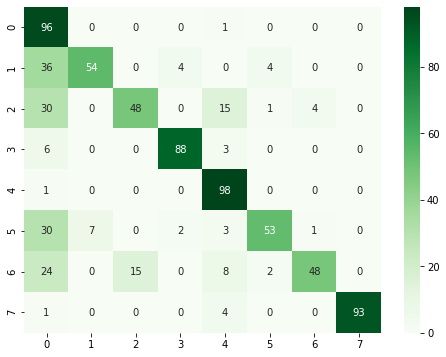

In [ ]:
show_conf_matrix(te_label,cnn_predictions)